<h1><center>Adults Dataset</center></h1>

# Machine Learning 1 - Lab 2: Classification

### Authors:
Richard Kim <br> Connor Dobbs<br> Joaquin Dominguez

## Data Preparation, Part 1

Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

### Import packages and Dataset

In [25]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hide deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [26]:
### Import dataset into 'df'
df = pd.read_csv('https://raw.githubusercontent.com/j-dominguez9/ML1_Proj1/main/Data/census_clean.csv')

In [27]:
## check types, get overview
df.info()

#double check nulls
df.isna().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45175 entries, 0 to 45174
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       45175 non-null  int64 
 1   age              45175 non-null  int64 
 2   workclass        45175 non-null  object
 3   fnlwgt           45175 non-null  int64 
 4   education        45175 non-null  object
 5   educational-num  45175 non-null  int64 
 6   marital-status   45175 non-null  object
 7   occupation       45175 non-null  object
 8   relationship     45175 non-null  object
 9   race             45175 non-null  object
 10  gender           45175 non-null  object
 11  capital-gain     45175 non-null  int64 
 12  capital-loss     45175 non-null  int64 
 13  hours-per-week   45175 non-null  int64 
 14  native-country   45175 non-null  object
 15  income           45175 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Check Distribution of Target Variable

In [28]:
# check balancing
df['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

In [29]:
# get percentages for 'income' distribution
less = 33973
greater = 11202
tot = less + greater
print(f'<=50k: {(less/tot)*100}%')
print(f'>50k: {(greater/tot)*100}%')


<=50k: 75.20309905921417%
>50k: 24.796900940785832%


It is clear from the distribution of our target variable (as outlined above) that applying a sampling method to balance the dataset would benefit the models that follow from the dataset.

### Prepare Dataset for Classification

In this step, we transformed all categorical variables (via OneHotEncoding method) to prepare the data for logistic regression. Note that in further modeling, these categorical variables will be refined further. 

In [30]:
# create dummy var for income

dummy = pd.get_dummies(df['income'])

df_1 = pd.concat((df, dummy), axis=1)

df_1 = df_1.drop(['income'], axis=1)

df_1 = df_1.drop(['<=50K'], axis=1)

df_1 = df_1.rename(columns={'>50K': 'income'})

In [31]:
# OneHotEncoding workclass variable
dummy = pd.get_dummies(df['workclass'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['workclass'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,hours-per-week,native-country,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,25,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,40,United-States,0,0,0,1,0,0,0,0
1,1,38,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,50,United-States,0,0,0,1,0,0,0,0
2,2,28,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,40,United-States,1,0,1,0,0,0,0,0
3,3,44,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,40,United-States,1,0,0,1,0,0,0,0
4,5,34,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,30,United-States,0,0,0,1,0,0,0,0


In [32]:
# OneHotEncoding gender variable
dummy = pd.get_dummies(df['gender'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['gender'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,capital-gain,...,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male
0,0,25,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,...,0,0,0,1,0,0,0,0,0,1
1,1,38,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,...,0,0,0,1,0,0,0,0,0,1
2,2,28,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,...,1,0,1,0,0,0,0,0,0,1
3,3,44,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,...,1,0,0,1,0,0,0,0,0,1
4,5,34,198693,10th,6,Never-married,Other-service,Not-in-family,White,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
# OneHotEncoding education var
dummy = pd.get_dummies(df['education'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['education'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,25,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,28,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,44,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,...,0,0,0,0,0,0,0,0,0,1
4,5,34,198693,6,Never-married,Other-service,Not-in-family,White,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#OneHotEncoding marital-status var
dummy = pd.get_dummies(df['marital-status'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['marital-status'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,...,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,25,226802,7,Machine-op-inspct,Own-child,Black,0,0,40,...,0,0,0,0,0,0,0,1,0,0
1,1,38,89814,9,Farming-fishing,Husband,White,0,0,50,...,0,0,0,0,0,1,0,0,0,0
2,2,28,336951,12,Protective-serv,Husband,White,0,0,40,...,0,0,0,0,0,1,0,0,0,0
3,3,44,160323,10,Machine-op-inspct,Husband,Black,7688,0,40,...,0,0,1,0,0,1,0,0,0,0
4,5,34,198693,6,Other-service,Not-in-family,White,0,0,30,...,0,0,0,0,0,0,0,1,0,0


In [35]:
#OneHotEncoding occupation var
dummy = pd.get_dummies(df['occupation'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['occupation'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,25,226802,7,Own-child,Black,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
1,1,38,89814,9,Husband,White,0,0,50,United-States,...,1,0,0,0,0,0,0,0,0,0
2,2,28,336951,12,Husband,White,0,0,40,United-States,...,0,0,0,0,0,0,1,0,0,0
3,3,44,160323,10,Husband,Black,7688,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,5,34,198693,6,Not-in-family,White,0,0,30,United-States,...,0,0,0,1,0,0,0,0,0,0


In [36]:
#OneHotEncoding relationship var
dummy = pd.get_dummies(df['relationship'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['relationship'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,race,capital-gain,capital-loss,hours-per-week,native-country,income,...,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,25,226802,7,Black,0,0,40,United-States,0,...,0,0,0,0,0,0,0,1,0,0
1,1,38,89814,9,White,0,0,50,United-States,0,...,0,0,0,0,1,0,0,0,0,0
2,2,28,336951,12,White,0,0,40,United-States,1,...,1,0,0,0,1,0,0,0,0,0
3,3,44,160323,10,Black,7688,0,40,United-States,1,...,0,0,0,0,1,0,0,0,0,0
4,5,34,198693,6,White,0,0,30,United-States,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
#OneHotEncoding race var
dummy = pd.get_dummies(df['race'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['race'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,25,226802,7,0,0,40,United-States,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,38,89814,9,0,0,50,United-States,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,28,336951,12,0,0,40,United-States,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3,44,160323,10,7688,0,40,United-States,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,34,198693,6,0,0,30,United-States,0,0,...,1,0,0,0,0,0,0,0,0,1


In [38]:
#OneHotEncoding native-country var
dummy = pd.get_dummies(df['native-country'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['native-country'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,25,226802,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,38,89814,9,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,28,336951,12,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,3,44,160323,10,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,34,198693,6,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df_1 = df_1.drop(['Unnamed: 0'], axis = 1)

df_1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


As shown in the output above, all categorical variables and respective levels were transformed into binary form.

In [40]:
### verify all variables have correct type

df_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45175 entries, 0 to 45174
Data columns (total 105 columns):
 #   Column                      Dtype
---  ------                      -----
 0   age                         int64
 1   fnlwgt                      int64
 2   educational-num             int64
 3   capital-gain                int64
 4   capital-loss                int64
 5   hours-per-week              int64
 6   income                      uint8
 7   Federal-gov                 uint8
 8   Local-gov                   uint8
 9   Private                     uint8
 10  Self-emp-inc                uint8
 11  Self-emp-not-inc            uint8
 12  State-gov                   uint8
 13  Without-pay                 uint8
 14  Female                      uint8
 15  Male                        uint8
 16  10th                        uint8
 17  11th                        uint8
 18  12th                        uint8
 19  1st-4th                     uint8
 20  5th-6th                    

It's important to ensure all variables have the right type for memory and modeling purposes.

### Split Dataset

First, we seperate the entire dataset into 'train' and 'test' with a 90/10 split. This 'test' set will be used as a hold out set for final evaluation after models have been hyperparameter tuned.

In [41]:
# create train, validation, and test sets

from sklearn.model_selection import train_test_split
from collections import Counter

df_2 = df_1.copy()

train, test = np.split(df_2.sample(frac=1), [int(.9*len(df_2))])
print(len(train))


40657


In [42]:
### import relevant function
from sklearn.model_selection import ShuffleSplit

### acquire target label values, delete column of said acquired values, and assign remaining variables and corresponding values to 'X'

if 'income' in train:
    y_train = train['income'].values 
    del train['income'] 
    X_train = train.values 


# target label values for test set
if 'income' in test:
    y_test = test['income'].values 
    del test['income'] 
    X_test = test.values 


### Sampling

As established above, given the unbalanced distribution of the target variable, we will be using different sampling methods to increase performance of models.

In [43]:
# Over sample dataset
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_over)}")

Training target statistics: Counter({0: 30603, 1: 30603})


In [44]:
# Under sample
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_under)}")

Training target statistics: Counter({0: 10054, 1: 10054})


### Standardize and Scale Data

We will standardize the dataset to ensure that each variable is weighted equally, since there are many variables on very different scales as well as one hot encoded categorical variables. This should help reduce model bias, improving performance, as well as making feature importance easier to interpret later on. 

In [45]:
from sklearn.preprocessing import StandardScaler
#standard set
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train = scl_obj.transform(X_train) 
X_test = scl_obj.transform(X_test)

#oversampled data 
scl_obj = StandardScaler()
scl_obj.fit(X_over)
X_over = scl_obj.transform(X_over) 
X_test_over = scl_obj.transform(X_test)

#undersampled data
scl_obj = StandardScaler()
scl_obj.fit(X_under)
X_under = scl_obj.transform(X_under) 
X_test_under = scl_obj.transform(X_test)



##  Data Preparation, Part 2

Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

Here is a glimpse of how the dataset looks like:

In [46]:
print(train.head())
print(train.shape)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
29021   36  184498                7             0             0   
28901   23  413345               13             0             0   
37209   28  410351                9             0             0   
44868   21  122348               10             0             0   
37868   49  187454                9         99999             0   

       hours-per-week  Federal-gov  Local-gov  Private  Self-emp-inc  ...  \
29021              40            0          0        1             0  ...   
28901              60            0          0        1             0  ...   
37209              40            0          0        0             0  ...   
44868              35            0          0        1             0  ...   
37868              65            0          0        1             0  ...   

       Portugal  Puerto-Rico  Scotland  South  Taiwan  Thailand  \
29021         0            0         0      0       0         0   


In the 'train' dataset, there are 40657 instances, wherein each instance represents an individual. Due to the transformation of categorical variables to OneHotEncoding binary format, the dataset holds 104 attributes for each instance. The value of the target variable is represented as a 1 if the individual has a reported annual income of greater than or equal to 50K USD and a 0 if it is less than 50K USD.

Additionally, given the unbalanced distribution of the target variable, we appplied two sampling methods (over and under) that may increase performance and evaluation of models being trained on this data.

# Modeling and Evaluation

## Evaluation Metrics

Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

### Income Classification Evaluation Metrics
Accuracy: <br>
> The first metric we will be using is Accuracy. By accuracy, we mean "the ratio of number of correct predictions to the total number of input samples."[^1] 

> Accuracy = Number of Correct Predictions/Total Number of Predictions Made

> By balancing our datset with respect to our target variable, we took measures to maximize the value that this metric provides. For our dataset, accuracy will give us a measure of how maany instances are correctly classified as >=50K  or <50K, in any given model.

Precision: <br>
> In order to get a more detailed look at what accuracy represents, we first break down the metric into Precision and Recall. Precision, in essence, outlines the proportion of positive identifications was actually correct[^2].

> Precision = True Positive/(True Positive + False Positive)

> For our dataset, Precision will give us a measure of the proportion of positives (>=50K) were classified correctly.

Sensitivity/Recall: <br>

> Recall, on the other hand, measures the proportion of actual positives that  were identified correctly[^3].

> Recall = True Positive/(True Positive + False Negative)

> For our dataset, Recall will give us a measure of how many of the instances that were actually >=50K were classified as such by the model.

Specificity: <br>
> Inversely to the previous measure, specificity (True Negative Rate) refers to the "proportion of negative data points that are correctly considered as negative, with respect to all negative data points."[^5]

> Sensitivity = True Negative/(True Negative + False Positive)

> For our dataset, specificity measures the proportion of actual <50K classified as such by a given model.

While we will look at the above metrics for income classifcation, the primary metric we will be looking to optimize in this case is Sensitivity, as it is the more useful metric in many contexts because it is harder to predict because it is a minority of people, and because predicting high earners could be used for things like targeted marketing campaigns for high margin products. 

[^1]: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
[^2]: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
[^3]: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
[^4]: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
[^5]: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

### Age Prediction Evaluation Metric

## Splitting

Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

The primary method used for splitting between training and testing splits is 10 fold shuffle cross validation. Shuffle split was chosen over K fold CV to help keep the validation scalable if the datasize is to grow in the future (for example if more years are to be brought in). It is not a large concern if a single observation is used multiple times, or one is not used at all, because with the current size of this dataset, the risk of over-biasing the model because of that is very low. 

With inbalanced data such as this, biasing for the majority class is a large risk. Random over and under sampling techinques were decided to be used to attempt to deal with bias from the lack of balance in the dataset rather than a stratified validation method. The over sampling method in particular is likely to help improve our important sensitivity metric by intentionally introducing bias towards the minority class (income > 50k) by randomly duplicating minority class observations to even out the balance of the dataset. The undersampling method instead seeks to reduce bias by randomly removing the majority class, however this comes with a higher risk of removing important information by cutting down the size of the data by a large margin, and because of this is the less preferred method. 

### Split Dataset

In data preparation, we seperated the entire dataset into 'train' and 'test' with a 90/10 split. This 'test' set will be used for final evaluation after models have been hyperparameter tuned.

Within the 'train' set, we create a 10-fold shuffle split cross validation object that can be used with the regular, over, and under sampled training data.

In [47]:
### import relevant function
from sklearn.model_selection import ShuffleSplit

### split data 80/20 with 10 cross-validation
num_cv_iterations = 10
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 42)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)


## Model Training

Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

### Income Classification

In [48]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate

### create LR object and apply parameters and consants

num_estimators = 50
# lets train some trees
clf_array = [
    ('Random Trees 1 per leaf', RandomForestClassifier(random_state = 42, min_samples_leaf = 1, n_estimators = num_estimators)),
    ('Random Trees 10 per leaf', RandomForestClassifier(random_state = 42, min_samples_leaf = 10, n_estimators = num_estimators)),
    ('Random Trees 30 per leaf', RandomForestClassifier(random_state = 42, min_samples_leaf = 30, n_estimators = num_estimators)),
    ('Random Trees 100 per leaf', RandomForestClassifier(random_state = 42, min_samples_leaf = 100, n_estimators = num_estimators)),
    ('LogReg L2 C1', LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear')),
    ('LogReg L1 C1', LogisticRegression(penalty='l1', C=1.0, class_weight=None, solver='liblinear')),
    ('LogReg L2 C.1', LogisticRegression(penalty='l2', C=.1, class_weight=None, solver='liblinear')),
    ('LogReg L1 C.1', LogisticRegression(penalty='l1', C=.1, class_weight=None, solver='liblinear')),
    ('LogReg L2 C5', LogisticRegression(penalty='l2', C=5.0, class_weight=None, solver='liblinear')),
    ('LogReg L1 C5', LogisticRegression(penalty='l1', C=5.0, class_weight=None, solver='liblinear')),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Bernoulli Naive Bayes', BernoulliNB())
    ]

scoring = {'acc': 'accuracy',
           'sens': 'recall'}

for clf in clf_array:
    scores = cross_validate(clf[1], X_train, y_train, scoring=scoring,
                         cv=cv_object, return_train_score=False)
    scoreso = cross_validate(clf[1], X_over, y_over, scoring=scoring,
                         cv=cv_object, return_train_score=False)
    scoresu = cross_validate(clf[1], X_under, y_under, scoring=scoring,
                         cv=cv_object, return_train_score=False)
    print ("Model:", clf[0], "Accuracy (Regular, Oversample, Undersample):", round(scores['test_acc'].mean(),2), round(scoreso['test_acc'].mean(),2), round(scoresu['test_acc'].mean(),2),
    "Sensitivity (Regular, Oversample, Undersample):", round(scores['test_sens'].mean(),2), round(scoreso['test_sens'].mean(),2), round(scoresu['test_sens'].mean(),2)) 

Model: Random Trees 1 per leaf Accuracy (Regular, Oversample, Undersample): 0.85 0.93 0.82 Sensitivity (Regular, Oversample, Undersample): 0.62 0.97 0.83
Model: Random Trees 10 per leaf Accuracy (Regular, Oversample, Undersample): 0.86 0.84 0.83 Sensitivity (Regular, Oversample, Undersample): 0.59 0.88 0.87
Model: Random Trees 30 per leaf Accuracy (Regular, Oversample, Undersample): 0.85 0.83 0.82 Sensitivity (Regular, Oversample, Undersample): 0.57 0.87 0.87
Model: Random Trees 100 per leaf Accuracy (Regular, Oversample, Undersample): 0.85 0.82 0.81 Sensitivity (Regular, Oversample, Undersample): 0.52 0.87 0.86
Model: LogReg L2 C1 Accuracy (Regular, Oversample, Undersample): 0.85 0.82 0.82 Sensitivity (Regular, Oversample, Undersample): 0.6 0.84 0.84
Model: LogReg L1 C1 Accuracy (Regular, Oversample, Undersample): 0.85 0.82 0.82 Sensitivity (Regular, Oversample, Undersample): 0.6 0.84 0.84
Model: LogReg L2 C.1 Accuracy (Regular, Oversample, Undersample): 0.85 0.82 0.82 Sensitivity (Re

### Age Prediction

## Results Analysis and Visualization



Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

### Income Classification

The over/under sampling methods improved sensitivity performance in the case of the RFC by a signficant amount, typically 20+ points, so the over sampled training data is used in the final models. 

The ROC curve below shows that the final three versions of all models performed similary when predicting the holdout test set, with AUCs ranging from .85 to .86. We see a dip indicating an increase in false positive rate with the Random Forest Classifier and NB model, indicating that the model is more likely than the others to predict that someone makes over 50k income. However the "cost" of a false positive in this context is quite low, so being aggressive with calling out positive values is acceptable. 

Based on the accuracy and sensitivity metrics in the above section and confusion matrix in the code below: 

1. The final model chosen for the Random Forest Classifier is using a minimum of 100 samples per leaf to reduce overfitting. While some of the higher depth models provided improved metrics, the performance gain is not worth the increased complexity and overfitting risk. The model only predicts 55 observations make over 50k which indicates there are very few "branches" that will lead to a positive prediction with the test holdout data. 
1. The logistic regression models were also able to perform well on the scaled data with a similar accuracy as the random forest classifier, however they performed consistently worse in specificity, the most important metric we are trying to optimize for. It is also worth noting it had the lowest AUC against the test set at .85 despite having the "smoothest" curve. There was little difference between various parameters when using the scaled and standardized data. 
1. Interestingly, the Bernoulli Naive Bayes model performed quite well against the holdout test data with the highest AUC of .86, despite underperforming with the cross validated training data. 

The confusion matrices show fairly similar performance between naive bayes and the logistic regression model as far as how often they were predicting that someone makes over 50k in income. 



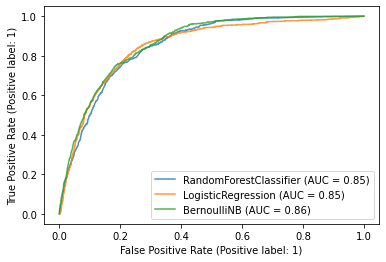

In [57]:
from sklearn.metrics import RocCurveDisplay

#final models and ROC curve (code from sklearn documentation)
rfc = RandomForestClassifier(random_state = 42, min_samples_leaf = 100, n_estimators = 50)
rfc.fit(X_over, y_over)

logreg = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' )
logreg.fit(X_over, y_over)

nb = BernoulliNB()
nb.fit(X_over, y_over)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test_over, y_test, ax=ax, alpha=0.8)
log_disp = RocCurveDisplay.from_estimator(logreg, X_test_over, y_test, ax=ax, alpha=0.8)
nb_disp = RocCurveDisplay.from_estimator(nb, X_test_over, y_test, ax=ax, alpha=0.8)
plt.show()

RFC Confusion Matrix


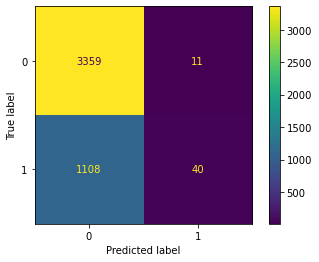

Logistic Regression Confusion Matrix


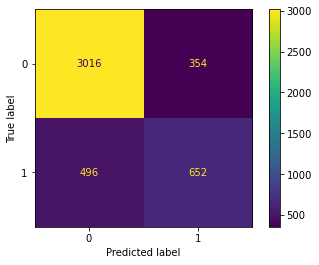

Naive Bayes Confusion Matrix


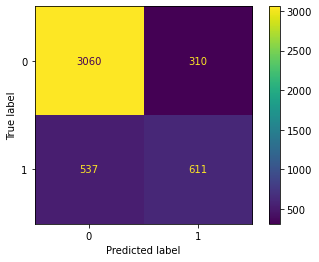

In [50]:
# Print Confusion Matrices (code from sklearn documentation)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

print("RFC Confusion Matrix")
plot_confusion_matrix(rfc, X_test_over, y_test)
plt.show()

print("Logistic Regression Confusion Matrix")
plot_confusion_matrix(logreg, X_test_over, y_test)
plt.show()

print("Naive Bayes Confusion Matrix")
plot_confusion_matrix(nb, X_test_over, y_test)
plt.show()

### Age Prediction

## Model Advantages

Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

### Income Classification

The Naive Bayes model performs the quickest, however the speed of the random forest classifier and the logistic regression models are also fairly quick, so time efficiency of the models is not a deciding factor in this case.

The logistic regression model is the most interpretable, however the drop in performance relative to the other two models against the test data is concerning and potentially shows that it is overfit. While the Naive Bayes model performed well against the test set, it struggled in the training cross validation which also suggests it may be underfit. 

The Random Forest Classifier performed consistently well and had a strong precision score. With requiring at least 100 samples per "leaf", the model should be reasonably well fit and not be overly biased. However, when performming a 10 KFold paired T test between the logistic regression and the Random Forest model, there was insufficient evidence to reject the null hypothesis that the two models perform equally. 

In [58]:
#paired 10fold ttest CV between RFC and Logreg

from mlxtend.evaluate import paired_ttest_kfold_cv


t, p = paired_ttest_kfold_cv(estimator1=rfc,
                              estimator2=logreg,
                              X=X_test_over, y=y_test,
                              random_seed=42, scoring = 'recall')

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)




c:\Users\dobbs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\dobbs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


t statistic: -10.662
p value: 0.000


c:\Users\dobbs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
#paired 10fold ttest CV between NB model and Logreg


t, p = paired_ttest_kfold_cv(estimator1=nb,
                              estimator2=logreg,
                              X=X_test_over, y=y_test,
                              random_seed=42, scoring = 'recall')

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

c:\Users\dobbs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\dobbs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


t statistic: 17.192
p value: 0.000


c:\Users\dobbs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Age Prediction

## Attribute Importance

Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

### Income Classification

### Age Prediction

## Deployment

How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

### Income Classification

1. The  model prediction itself could be quite useful for reasons mentioned earlier, such as helping target marketing campaigns to high earners based off of demographic information if other information (such as spending habits) is not as easily available.
1. The feature interpretation itself provides useful context in what is correlated with income. These factors can be looked at to see if there is anything surprising or indications of more systemic inequality. 

Since the data is quite outdated, it probably can't provide useful conclusions to today. However, it provides the barebones to "productinize" the model with updated census data or other demographic information. Being able to update the information with new variables or updated information will help it retain it's usefulness in either direction of prediction or interpretation. With that in mind, the 50k threshold is probably less useful today than it was before, and there could be an issue with accounting for inflation if collecting data from longer periods of time together. 

## Exceptional Work

You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?